<font size="7"><b>Data Storytelling: Apply Your Storytelling Skills</b></font>

<font size="6"><b>Nutrition facts for Starbucks Menu</b></font>

In this notebook, we'll delve into the nutritional content of Starbucks menu items, exploring key factors such as calorie counts, fat content, and other nutritional components. Starbucks, a renowned global coffeehouse chain, offers a diverse range of beverages and food items, catering to various tastes and preferences.

Understanding the nutritional profile of Starbucks menu items is essential for individuals conscious about their dietary intake, whether they are seeking healthier options or simply curious about the nutritional content of their favorite Starbucks treats. This analysis aims to provide insights into the nutritional aspects of Starbucks menu items, enabling consumers to make informed choices aligned with their health and wellness goals.

By employing data analysis and visualization techniques, we'll uncover patterns, trends, and correlations within the Starbucks menu, shedding light on the nutritional landscape of popular beverages and food offerings.

Whether you're a Starbucks enthusiast, a health-conscious consumer, or a data enthusiast eager to explore real-world datasets, this notebook offers valuable insights into the nutrition facts of Starbucks menu items. Let's embark on this journey to uncover the nutritional secrets behind your favorite Starbucks indulgences!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 0. Dependencies

In [2]:
import os
from os.path import join

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

from wordcloud import WordCloud

# Suppress deprecation and incorrect usage warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip show seaborn

Name: seaborn
Version: 0.13.1
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pandas
Required-by: lida, missingno


In [4]:
import inspect

# Get the source file of the barplot function
source_file = inspect.getsourcefile(sns.jointplot)

# Print the source file
print("Source file:", source_file)

Source file: /usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py


In [5]:
%load /usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py

# 1. Functions

## <b><code>remove_redundant_spaces_of_column_names()</code></b>

In [6]:
def remove_redundant_spaces_of_column_names(
    df
):
    """
    Removes redundant leading and trailing spaces from column names in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing columns with redundant spaces.

    Returns:
    - pd.DataFrame: A new DataFrame with column names without redundant spaces.
    """
    # -------------------------------------------------------------------------
    print("Column names before changes:\n")
    print(df.columns)
    # -------------------------------------------------------------------------
    # Create a dictionary to map old column names to new names with spaces removed
    column_mapping = {
        col: col.strip()
        for col
        in df.columns
    }

    # Rename the columns in the DataFrame
    df.rename(
          columns = column_mapping
        , inplace = True
    )
    # -------------------------------------------------------------------------
    print("\nColumn names after changes:\n")
    print(df.columns)

## <b><code>detect_cat_cols_and_their_unique_values()</code></b>

In [7]:
def detect_cat_cols_and_their_unique_values(
    df
):
    """
    Detect categorical columns in the DataFrame and print their unique values.

    Parameters:
    - df (DataFrame): The input DataFrame.

    Returns:
    - None
    """
    # Identify categorical columns
    categorical_columns = df\
                          .select_dtypes(include=['object', 'category'])\
                          .columns

    # Loop through each categorical column and print its unique values
    for column in categorical_columns:
        unique_values = df[column].unique()
        print(f"Column: {column}")
        print(f"Unique Values: {unique_values}")
        print("\n")

## <b><code>show_barplot()</code></b>

In [8]:
def show_barplot(
      df
    , x
    , y
    , title
    , palette = "Set1"
    , figsize = (7, 5)
):
    """
    Plot a barplot with seaborn.

    Parameters:
    - df (DataFrame): The input DataFrame.
    - x (str): The column name to be used as the x-axis.
    - y (str): The column name to be used as the y-axis.
    - title (str): The title of the plot.
    - palette (str): The color palette to be used.
    - figsize (tuple): The figure size.

    Returns:
    - None
    """
    # -------------------------------------------------------------------------
    #                          CUSTOMIZE FIGURE
    # -------------------------------------------------------------------------
    plt.figure(
          figsize   = figsize
        , edgecolor = 'black'
    )

    sns.set_theme(
        style = 'whitegrid'
    )
    # -------------------------------------------------------------------------
    #                              BARPLOT
    # -------------------------------------------------------------------------
    ax = sns.barplot(
          data    = df
        , x       = x
        , y       = y
        , palette = palette
    )

    plt.title(
          title
        , size = 16
    )
    # -------------------------------------------------------------------------
    #                        AXES TICKS AND LABELS
    # -------------------------------------------------------------------------
    plt.xlabel(x, size=14)
    plt.ylabel(y, size=14)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # Change y-label text color based on palette colors
    palette_colors     = sns.color_palette(palette)
    num_palette_colors = len(palette_colors)

    for i, tick_label in enumerate(ax.get_yticklabels()):
        tick_color = palette_colors[i % num_palette_colors]
        tick_label.set_color(tick_color)
    # -------------------------------------------------------------------------
    ax.set_frame_on(True)

    # Customize the axis spines using a for loop
    for spine in ['top', 'left', 'right', 'bottom']:
        ax.spines[spine].set_color('black')

    # Set the color of x-axis gridlines
    ax.xaxis.grid(
          alpha     = 0.7
        , linewidth = 0.7
        , linestyle = '--'
    )
    # -------------------------------------------------------------------------
    plt.show()

## <b><code>plot_correlation_heatmap()</code></b>

In [9]:
def plot_correlation_heatmap(
      df
    , figsize = (7, 5)
):
    """
    Plot a heatmap to visualize the correlation matrix of a DataFrame.

    Parameters:
    - df (DataFrame): The input DataFrame containing numeric columns.

    Returns:
    - None
    """
    # -------------------------------------------------------------------------
    plt.figure(
        figsize = figsize
    )

    plt.title(
          'Correlation Matrix'
        , fontsize = 16
    )
    # -------------------------------------------------------------------------
    #                               MASK
    # -------------------------------------------------------------------------
    # Create a mask to hide the upper triangular portion
    mask = np\
          .tri(df.corr().shape[0], k=-1)\
          .T
    # -------------------------------------------------------------------------
    #                              HEATMAP
    # -------------------------------------------------------------------------
    p = sns.heatmap(
          df.corr()
        , cmap        = 'coolwarm'
        , mask        = mask
        , cbar        = True
        , vmin        = -1
        , vmax        =  1
        , annot       = True
        , annot_kws   = {'fontsize': 8}
        , xticklabels = True
        , yticklabels = True
    )
    # -------------------------------------------------------------------------
    #                       AXES TICKS AND LABELS
    # -------------------------------------------------------------------------
    # Set the font size for x and y axis ticks
    p.set_xticklabels(p.get_xticklabels(), fontsize=10)
    p.set_yticklabels(p.get_yticklabels(), fontsize=10)
    # -------------------------------------------------------------------------
    plt.show()

## <b><code>plot_box_boxen_violin_plots()</code></b>

In [10]:
def plot_box_boxen_violin_plots(
      df
    , x
    , y
    , title
    , palette = 'hls'
):
    """
    Plot box, boxen, and violin plots in separate subplots.

    Parameters:
    - df (DataFrame): The input DataFrame.
    - x (str): The column name to be used as the x-axis.
    - y (str): The column name to be used as the y-axis.
    - title (str): The title of the plot.
    - palette (str): The color palette to be used.

    Returns:
    - No
    """
    # -------------------------------------------------------------------------
    # Create subplots with 3 rows and 1 column, sharing the same x-axis
    fig, axes = plt.subplots(
          3
        , 1
        , sharex  = True
        , figsize = (10, 7)
    )

    sns.set_theme(
        style = 'whitegrid'
    )

    plt.suptitle(
          title
        , x        = 0.65
        , fontsize = 16
    )
    # -------------------------------------------------------------------------
    #                                BOX
    # -------------------------------------------------------------------------
    sns.boxplot(
          df
        , x       = x
        , y       = y
        , ax      = axes[0]
        , palette = palette
    )

    axes[0].set_title('Box Plot')
    # -------------------------------------------------------------------------
    #                              BOXEN
    # -------------------------------------------------------------------------
    sns.boxenplot(
          df
        , x       = x
        , y       = y
        , ax      = axes[1]
        , palette = palette
    )

    axes[1].set_title('Boxen Plot')
    # -------------------------------------------------------------------------
    #                              VIOLIN
    # -------------------------------------------------------------------------
    sns.violinplot(
          df
        , x       = x
        , y       = y
        , ax      = axes[2]
        , palette = palette
    )

    axes[2].set_title('Violin Plot')
    # -------------------------------------------------------------------------
    #                       AXES TICKS AND LABELS
    # -------------------------------------------------------------------------
    for ax in axes:
      ax.set_frame_on(True)

      for spine in ['top', 'left', 'right', 'bottom']:
          ax.spines[spine].set_color('black')

      if ax == axes[2]:
          ax.xaxis.set_ticks_position('bottom')
      else:
          ax.xaxis.set_ticks_position('none')

      ax.yaxis.set_ticks_position('left')

      ax.grid(
            axis      = 'x'
          , alpha     = 0.7
          , linewidth = 0.7
          , linestyle = '--'
      )

      # Change y-label text color based on palette colors
      palette_colors     = sns.color_palette(palette)
      num_palette_colors = len(palette_colors)

      for i, tick_label in enumerate(ax.get_yticklabels()):
          tick_color = palette_colors[i % num_palette_colors]
          tick_label.set_color(tick_color)
    # -------------------------------------------------------------------------
    plt.tight_layout()
    plt.show()

## <b><code>joint_plot_with_kde_contours()</code></b>

In [11]:
def joint_plot_with_kde_contours(
      df
    , x
    , y
    , kind
    , color
    , height
    , kde_contours = False
):
    """
    Plot a joint plot with optional KDE contours.

    Parameters:
    - df (DataFrame): The input DataFrame.
    - x (str): The column name for the x-axis.
    - y (str): The column name for the y-axis.
    - kind (str): The type of joint plot.
    - color (str): The color of the plot.
    - height (int): The height of the plot.
    - kde_contours (bool): Whether to include KDE contours.

    Returns:
    - None
    """
    # -------------------------------------------------------------------------
    sns.set_theme(
        style='ticks'
    )
    # -------------------------------------------------------------------------
    #                             JOINTPLOT
    # -------------------------------------------------------------------------
    joint = sns.jointplot(
          data   = df
        , x      = x
        , y      = y
        , kind   = kind
        , color  = color
        , height = height
    )
    # -------------------------------------------------------------------------
    #                      ADD KDE CONTOURS, IF TRUE
    # -------------------------------------------------------------------------
    # Plots contour lines of the KDE if the jointplot type is Hexbins
    if kind == 'hex' and kde_contours == True:
      joint.plot_joint(
            sns.kdeplot
          , color      = "r"
          , levels     = 6
          , linewidths = 3
      )
    # -------------------------------------------------------------------------
    #                           PLOT'S TITLE
    # -------------------------------------------------------------------------
    title = f"Joint Distribution of\n{x} and {y.split(' ')[0]}"

    # Add KDE to the title, if 'True'
    if kde_contours == True:
      title += "\n (with KDE contours)"

    # Location and font size of 'title'
    joint.fig.suptitle(
          title
        , y        = 1.1
        , fontsize = 16
    )
    # -------------------------------------------------------------------------
    #                             GRIDLINES
    # -------------------------------------------------------------------------
    # Add gridlines to the joint plot
    joint.ax_joint.grid(
          True
        , alpha     = 0.7
        , linewidth = 0.7
        , linestyle = '--'
    )
    # -------------------------------------------------------------------------
    #               SET BACKGROUND COLOR OF PLOTS TO 'NONE'
    # -------------------------------------------------------------------------
    # Set the background of all axes (main plot and margins) to transparent
    for ax in [joint.ax_joint, joint.ax_marg_x, joint.ax_marg_y]:
        ax.set_facecolor('none')

    # Set the figure background to transparent
    joint.fig.patch.set(
          alpha     = 0.0
        , facecolor = 'none'
    )

    # Set gridlines to be above the hexbins by changing the zorder
    joint.ax_joint.grid(
          True
        , zorder = 0
    )

    for collection in joint.ax_joint.collections:
        collection.set_zorder(0)
    # -------------------------------------------------------------------------
    plt.show()

## <b><code>swarm_plot()</code></b>

In [12]:
def swarm_plot(
      df
    , x
    , y
    , hue
    , figsize = (7, 6)
):
    """
    Plot a swarm plot.

    Parameters:
    - df (DataFrame): The input DataFrame.
    - x (str): The column name for the x-axis.
    - y (str): The column name for the y-axis.
    - hue (str): The column name for color grouping.
    - figsize (tuple): The size of the figure.

    Returns:
    - None
    """
    # -------------------------------------------------------------------------
    plt.figure(
        figsize = figsize
    )

    sns.set_theme(
        style='ticks'
    )

    plt.title(
        f'Distribution of {x} by {y}'
    )
    # -------------------------------------------------------------------------
    plot = sns.swarmplot(
          data    = sb_full_menu
        , x       = x
        , y       = y
        , hue     = hue
        , palette = 'Paired'
    )

    # Adjust the size of the points (circles)
    for collection in plot.collections:
        collection.set_sizes([50])
    # -------------------------------------------------------------------------
    sns.move_legend(
          plot
        , "upper left"
        , frameon        = False
        , bbox_to_anchor = (1, 1)
    )

    plot.grid(
          True
        , alpha     = 0.7
        , linewidth = 0.7
        , linestyle = '--'
    )
    # -------------------------------------------------------------------------
    plt.show()

## <b><code>ecdf_plot()</code></b>

In [13]:
def ecdf_plot(
      df
    , x
    , color
    , figsize = (5, 3)
):
    """
    Plot the empirical cumulative distribution function (ECDF).

    Parameters:
    - df (DataFrame): The input DataFrame.
    - x (str): The column name for the x-axis.
    - color (str): The color for the ECDF plot.
    - figsize (tuple): The size of the figure.

    Returns:
    - None
    """
    # -------------------------------------------------------------------------
    plt.figure(
        figsize = figsize
    )

    sns.set_theme(
        style = 'whitegrid'
    )
    # -------------------------------------------------------------------------
    fig = sns.ecdfplot(
          data      = df
        , x         = x
        , color     = color
        , linewidth = 2
    )

    fig.set_title(
        f'ECDF of {x}'
    )
    # -------------------------------------------------------------------------
    # Set frame, ticks, and grid for the axis
    fig.set_frame_on(True)
    fig.xaxis.set_ticks_position('bottom')
    fig.yaxis.set_ticks_position('left')

    fig.grid(
          True
        , alpha     = 0.7
        , linewidth = 0.7
        , linestyle = '--'
    )

    for spine in ['top', 'left', 'right', 'bottom']:
        fig.spines[spine].set_color('black')
    # -------------------------------------------------------------------------
    # Calculate median and quartiles
    median    = df[x].median()
    quartiles = np.percentile(df[x], [25, 75])

    # Add vertical lines for median and quartiles
    plt.axvline(median      , color='red' , linestyle='--', label=f'Median ({median})')
    plt.axvline(quartiles[0], color='blue', linestyle='-.', label=f'1st Quartile ({quartiles[0]})')
    plt.axvline(quartiles[1], color='blue', linestyle='-.', label=f'3rd Quartile ({quartiles[1]})')
    # -------------------------------------------------------------------------
    # Add legend for median and quartiles with black border
    legend = plt.legend()

    legend\
    .get_frame()\
    .set_edgecolor('black')
    # -------------------------------------------------------------------------
    plt.show()

---

# 2. Datasets

In [14]:
path_default = "/content/drive/MyDrive/Colab Notebooks/data"

## 2.1. Menu (Full)

In [15]:
sb_full_menu = pd.read_csv(
      join(path_default, '20.3. starbucks_drinkMenu_expanded.csv')
    , encoding = 'utf-8'
)

In [16]:
sb_full_menu.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [17]:
remove_redundant_spaces_of_column_names(
    sb_full_menu
)

Column names before changes:

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

Column names after changes:

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')


In [18]:
detect_cat_cols_and_their_unique_values(
    sb_full_menu
)

Column: Beverage_category
Unique Values: ['Coffee' 'Classic Espresso Drinks' 'Signature Espresso Drinks'
 'Tazo® Tea Drinks' 'Shaken Iced Beverages' 'Smoothies'
 'Frappuccino® Blended Coffee' 'Frappuccino® Light Blended Coffee'
 'Frappuccino® Blended Crème']


Column: Beverage
Unique Values: ['Brewed Coffee' 'Caffè Latte' 'Caffè Mocha (Without Whipped Cream)'
 'Vanilla Latte (Or Other Flavoured Latte)' 'Caffè Americano' 'Cappuccino'
 'Espresso' 'Skinny Latte (Any Flavour)' 'Caramel Macchiato'
 'White Chocolate Mocha (Without Whipped Cream)'
 'Hot Chocolate (Without Whipped Cream)'
 'Caramel Apple Spice (Without Whipped Cream)' 'Tazo® Tea'
 'Tazo® Chai Tea Latte' 'Tazo® Green Tea Latte'
 'Tazo® Full-Leaf Tea Latte'
 'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)'
 'Iced Brewed Coffee (With Classic Syrup)'
 'Iced Brewed Coffee (With Milk & Classic Syrup)'
 'Shaken Iced Tazo® Tea (With Classic Syrup)'
 'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)'
 'Banana Chocolate Smoothie' 'O

<br>

<table border="1">
    <thead>
        <tr>
            <th><font size="4">Beverage Category</font></th>
            <th><font size="4">Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><font size="5"><b><code>Coffee</code></b></font></td>
            <td>
                <ul>
                    <li>Includes classic coffee options such as brewed coffee and iced brewed coffee.</li>
                    <li>Offers various roast levels and customization options.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Classic Espresso Drinks</code></b></font></td>
            <td>
                <ul>
                    <li>Features classic espresso-based drinks like Caffè Latte and Cappuccino.</li>
                    <li>Primarily made with espresso shots.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Signature Espresso Drinks</code></b></font></td>
            <td>
                <ul>
                    <li>Includes unique and flavorful combinations of espresso, milk, and syrups.</li>
                    <li>Examples include Caramel Macchiato and White Chocolate Mocha.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Tazo® Tea Drinks</code></b></font></td>
            <td>
                <ul>
                    <li>Offers a variety of tea-based beverages made with Tazo® teas.</li>
                    <li>Includes options like Tazo® Chai Tea Latte and Tazo® Green Tea Latte.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Shaken Iced Beverages</code></b></font></td>
            <td>
                <ul>
                    <li>Includes iced beverages made by shaking tea and syrup.</li>
                    <li>Examples include Shaken Iced Tazo® Tea and Shaken Iced Tazo® Tea Lemonade.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Smoothies</code></b></font></td>
            <td>
                <ul>
                    <li>Offers fruity and refreshing smoothies with options like Banana Chocolate Smoothie and Orange Mango Banana Smoothie.</li>
                    <li>Combines fruit, yogurt, and ice for a creamy texture.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Frappuccino® Blended Coffee</code></b></font></td>
            <td>
                <ul>
                    <li>Features creamy and blended coffee drinks like Mocha, Caramel, and Java Chip Frappuccinos.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Frappuccino® Light Blended Coffee</code></b></font></td>
            <td>
                <ul>
                    <li>Similar to the previous category but with lighter versions of the blended coffee drinks.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Frappuccino® Blended Crème</code></b></font></td>
            <td>
                <ul>
                    <li>Includes non-coffee-based blended beverages like Strawberries & Crème and Vanilla Bean Frappuccinos.</li>
                </ul>
            </td>
        </tr>
    </tbody>
</table>

<br><br>


<table border="1">
    <thead>
        <tr>
            <th><font size="4">Beverage Name</font></th>
            <th><font size="4">Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><font size="5"><b><code>Brewed Coffee</code></b></font></td>
            <td>
                <ul>
                    <li>A classic coffee made by brewing ground coffee beans with hot water.</li>
                    <li>Typically available in different roast levels and can be customized with various additions like cream and sugar.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Caffè Latte</code></b></font></td>
            <td>
                <ul>
                    <li>A coffee drink made with espresso and steamed milk.</li>
                    <li>Often topped with a small amount of milk foam.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Caffè Mocha<br><font color="red">(Without Whipped Cream)</code></b></font></td>
            <td>
                <ul>
                    <li>A rich and chocolatey coffee drink made with espresso, cocoa, steamed milk, and sometimes whipped cream (if specified without).</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Vanilla Latte<br><font color="red">(Or Other Flavoured Latte)</code></b></font></td>
            <td>
                <ul>
                    <li>Similar to a Caffè Latte but with added flavor syrups like vanilla.</li>
                    <li>Available in various flavor options.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Caffè Americano</code></b></font></td>
            <td>
                <ul>
                    <li>Made by diluting espresso shots with hot water.</li>
                    <li>Has a taste similar to drip coffee but stronger.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Cappuccino</code></b></font></td>
            <td>
                <ul>
                    <li>Made with equal parts espresso, steamed milk, and milk foam.</li>
                    <li>Known for its frothy top and balanced flavors.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Espresso</code></b></font></td>
            <td>
                <ul>
                    <li>A concentrated coffee beverage made by forcing hot water through finely-ground coffee beans.</li>
                    <li>Served in small shots and forms the base for many other coffee drinks.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Caramel Macchiato</code></b></font></td>
            <td>
                <ul>
                    <li>A coffee drink made with espresso, vanilla syrup, steamed milk, and caramel drizzle.</li>
                    <li>Typically served hot or iced.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>White Chocolate Mocha<br><font color="red">(Without Whipped Cream)</code></b></font></td>
            <td>
                <ul>
                    <li>A coffee drink made with espresso, white chocolate sauce, steamed milk, and sometimes whipped cream (if specified without).</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Hot Chocolate<br><font color="red">(Without Whipped Cream)</code></b></font></td>
            <td>
                <ul>
                    <li>A warm, chocolate-flavored drink made with cocoa and steamed milk (if specified without whipped cream).</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Caramel Apple Spice<br><font color="red">(Without Whipped Cream)</code></b></font></td>
            <td>
                <ul>
                    <li>A warm and spiced apple cider drink with caramel syrup (if specified without whipped cream).</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Tazo® Tea</code></b></font></td>
            <td>
                <ul>
                    <li>Starbucks offers a variety of Tazo® teas, including black, green, and herbal teas.</li>
                    <li>Can be served hot or iced.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Tazo® Chai Tea Latte</code></b></font></td>
            <td>
                <ul>
                    <li>A spiced tea latte made with Tazo® chai tea concentrate, steamed milk, and sweetened with honey.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Tazo® Green Tea Latte</code></b></font></td>
            <td>
                <ul>
                    <li>A tea latte made with Tazo® green tea concentrate, steamed milk, and sometimes sweetened.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Tazo® Full-Leaf Tea Latte</code></b></font></td>
            <td>
                <ul>
                    <li>Starbucks offers full-leaf tea lattes made with Tazo® teas.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Tazo® Full-Leaf Red Tea Latte<br><font color="red">(Vanilla Rooibos)</code></b></font></td>
            <td>
                <ul>
                    <li>A tea latte made with Tazo® full-leaf red tea (Vanilla Rooibos), steamed milk, and sometimes sweetened.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Iced Brewed Coffee<br><font color="red">(With Classic Syrup)</code></b></font></td>
            <td>
                <ul>
                    <li>Iced coffee made with classic syrup for sweetness.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Iced Brewed Coffee<br><font color="red">(With Milk & Classic Syrup)</code></b></font></td>
            <td>
                <ul>
                    <li>Iced coffee made with milk and classic syrup for sweetness.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Shaken Iced Tazo® Tea<br><font color="red">(With Classic Syrup)</code></b></font></td>
            <td>
                <ul>
                    <li>Iced Tazo® tea shaken with classic syrup for sweetness.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Shaken Iced Tazo® Tea Lemonade<br><font color="red">(With Classic Syrup)</code></b></font></td>
            <td>
                <ul>
                    <li>Iced Tazo® tea and lemonade shaken with classic syrup for sweetness.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Banana Chocolate Smoothie</code></b></font></td>
            <td>
                <ul>
                    <li>A blended beverage made with bananas, chocolate, milk, and ice.</li>
                    <li>Offers a creamy and fruity flavor.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Orange Mango Banana Smoothie</code></b></font></td>
            <td>
                <ul>
                    <li>A blended beverage made with orange, mango, banana, yogurt, and ice.</li>
                    <li>Refreshing and tropical in flavor.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Strawberry Banana Smoothie</code></b></font></td>
            <td>
                <ul>
                    <li>A blended beverage made with strawberries, bananas, yogurt, and ice.</li>
                    <li>Combines fruity and creamy flavors.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Coffee</code></b></font></td>
            <td>
                <ul>
                    <li>Refers to regular brewed coffee, often available in different roast options.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Mocha<br><font color="red">(Without Whipped Cream)</code></b></font></td>
            <td>
                <ul>
                    <li>A coffee drink made with espresso, cocoa, steamed milk, and sometimes whipped cream (if specified without).</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Caramel<br><font color="red">(Without Whipped Cream)</code></b></font></td>
            <td>
                <ul>
                    <li>A coffee drink made with espresso, caramel syrup, steamed milk, and sometimes whipped cream (if specified without).</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Java Chip<br><font color="red">(Without Whipped Cream)</code></b></font></td>
            <td>
                <ul>
                    <li>A coffee drink made with espresso, java chips, mocha sauce, milk, and sometimes whipped cream (if specified without).</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Mocha</code></b></font></td>
            <td>
                <ul>
                    <li>A coffee drink made with espresso, cocoa, steamed milk, and sometimes whipped cream.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Caramel</code></b></font></td>
            <td>
                <ul>
                    <li>A coffee drink made with espresso, caramel syrup, steamed milk, and sometimes whipped cream.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Java Chip</code></b></font></td>
            <td>
                <ul>
                    <li>A coffee drink made with espresso, java chips, mocha sauce, milk, and sometimes whipped cream.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Strawberries & Crème<br><font color="red">(Without Whipped Cream)</code></b></font></td>
            <td>
                <ul>
                    <li>A creamy and fruity blended beverage made with strawberries, milk, and ice (if specified without whipped cream).</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td><font size="5"><b><code>Vanilla Bean<br><font color="red">(Without Whipped Cream)</code></b></font></td>
            <td>
                <ul>
                    <li>A vanilla-flavored, creamy, and blended beverage (if specified without whipped cream).</li>
                </ul>
            </td>
        </tr>
    </tbody>
</table>

In [19]:
sb_full_menu\
.duplicated()\
.sum()

0

In [20]:
sb_full_menu\
.drop_duplicates(inplace=True)

In [21]:
sb_full_menu\
.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [22]:
sb_full_menu\
.isna()\
.sum()

Beverage_category          0
Beverage                   0
Beverage_prep              0
Calories                   0
Total Fat (g)              0
Trans Fat (g)              0
Saturated Fat (g)          0
Sodium (mg)                0
Total Carbohydrates (g)    0
Cholesterol (mg)           0
Dietary Fibre (g)          0
Sugars (g)                 0
Protein (g)                0
Vitamin A (% DV)           0
Vitamin C (% DV)           0
Calcium (% DV)             0
Iron (% DV)                0
Caffeine (mg)              1
dtype: int64

In [23]:
sb_full_menu.fillna(
      sb_full_menu.mean()
    , inplace = True
)

In [24]:
sb_full_menu\
.describe()\
.round(3)

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000,242.000,242.000,242.000,242.000,242.000,242.000,242.000,242.000
mean,193.872,1.307,0.038,6.364,128.884,35.992,0.806,32.963,6.979
std,102.863,1.640,0.071,8.630,82.303,20.795,1.446,19.730,4.872
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,120.000,0.100,0.000,0.000,70.000,21.000,0.000,18.000,3.000
50%,185.000,0.500,0.000,5.000,125.000,34.000,0.000,32.000,6.000
75%,260.000,2.000,0.100,10.000,170.000,50.750,1.000,43.750,10.000
max,510.000,9.000,0.300,40.000,340.000,90.000,8.000,84.000,20.000


In [25]:
# Handle 'Iron (% DV)' percentages with decimal places
sb_full_menu['Iron (% DV)'] = sb_full_menu['Iron (% DV)']\
                              .str\
                              .replace('.00', '')

In [26]:
# Replace troublesome entry
sb_full_menu.loc[237, 'Total Fat (g)'] = '3.2'

In [27]:
sb_full_menu.tail()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3.2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0
241,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Grande Nonfat Milk,240,0.1,0.1,0.0,5,230,56,0,55,5.0,8%,0%,15%,0%,0


In [28]:
# Impute None for "Varies" because we don't know the value
sb_full_menu['Caffeine (mg)'].replace(
      {'Varies': None, 'varies': None}
    , inplace = True
)

In [29]:
percent_columns = [
      'Iron (% DV)'
    , 'Calcium (% DV)'
    , 'Vitamin A (% DV)'
    , 'Vitamin C (% DV)'
]

# Add "0." to percent columns
sb_full_menu[percent_columns] = "0." + sb_full_menu[percent_columns]

# Remove "%" from percent columns
sb_full_menu[percent_columns] = sb_full_menu[percent_columns].replace(
      {'%': ''}
    , regex = True
)

In [30]:
# Convert specified columns to numeric
columns_to_change = [
      'Iron (% DV)'
    , 'Caffeine (mg)'
    , 'Total Fat (g)'
    , 'Calcium (% DV)'
    , 'Vitamin A (% DV)'
    , 'Vitamin C (% DV)'
]

sb_full_menu[columns_to_change] = sb_full_menu[columns_to_change].apply(pd.to_numeric)

In [31]:
# Iterative Imputation
iter_imputer = IterativeImputer(
      verbose          = 0
    , max_iter         = 10
    , random_state     = 24
    , imputation_order = 'roman'
    , missing_values   = np.nan
)

sb_full_menu_num = sb_full_menu.iloc[:, 3:]

imp_full_menu_num = pd.DataFrame(
    iter_imputer.fit_transform(sb_full_menu_num)
)

sb_full_menu.iloc[:, 3:] = imp_full_menu_num

## 2.2. Menu (Foods)

In [32]:
sb_food_menu = pd.read_csv(
      join(path_default, '20.3. starbucks-menu-nutrition-food.csv')
    , encoding = 'utf-16'
)

In [33]:
sb_food_menu\
.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


In [34]:
sb_food_menu.set_index(
      'Unnamed: 0'
    , inplace = True
)

In [35]:
remove_redundant_spaces_of_column_names(
    sb_food_menu
)

Column names before changes:

Index([' Calories', ' Fat (g)', ' Carb. (g)', ' Fiber (g)', ' Protein (g)'], dtype='object')

Column names after changes:

Index(['Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein (g)'], dtype='object')


In [36]:
detect_cat_cols_and_their_unique_values(
    sb_food_menu
)

In [37]:
sb_food_menu\
.duplicated()\
.sum()

3

In [38]:
sb_food_menu\
.drop_duplicates(inplace=True)

In [39]:
sb_food_menu\
.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, Chonga Bagel to Seasonal Fruit Blend
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Calories     110 non-null    int64  
 1   Fat (g)      110 non-null    float64
 2   Carb. (g)    110 non-null    int64  
 3   Fiber (g)    110 non-null    int64  
 4   Protein (g)  110 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 5.2+ KB


In [40]:
sb_food_menu\
.isna()\
.sum()

Calories       0
Fat (g)        0
Carb. (g)      0
Fiber (g)      0
Protein (g)    0
dtype: int64

In [41]:
sb_food_menu\
.describe()\
.round(3)

,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
count,110.000,110.000,110.000,110.000,110.000
mean,358.455,16.400,41.600,2.909,11.718
std,128.307,8.379,15.909,2.904,8.440
min,90.000,0.000,5.000,0.000,1.000
25%,280.000,9.000,31.250,1.000,5.000
50%,360.000,17.000,42.000,2.000,9.000
75%,457.500,23.000,53.000,3.750,19.000
max,650.000,37.000,80.000,21.000,34.000


## 2.3. Menu (Drinks)

In [42]:
sb_drink_menu = pd.read_csv(
      join(path_default, '20.3. starbucks-menu-nutrition-drinks.csv')
    , encoding = 'utf-8'
)

In [43]:
sb_drink_menu.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [44]:
# Set the index of dataset 2 and 3 to the drink name
sb_drink_menu.set_index(
      'Unnamed: 0'
    , inplace = True
)

In [45]:
remove_redundant_spaces_of_column_names(
    sb_drink_menu
)

Column names before changes:

Index(['Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein', 'Sodium'], dtype='object')

Column names after changes:

Index(['Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein', 'Sodium'], dtype='object')


In [46]:
detect_cat_cols_and_their_unique_values(
    sb_drink_menu
)

Column: Calories
Unique Values: ['45' '-' '80' '60' '110' '0' '130' '140' '150' '70' '120' '30' '90' '210'
 '200' '50' '10' '5' '320' '430' '190' '290' '250' '260' '180' '230' '300'
 '360' '350' '280']


Column: Fat (g)
Unique Values: ['0' '-' '2.5' '5' '6' '9' '26' '7' '8' '4' '4.5' '1' '11' '0.5' '2']


Column: Carb. (g)
Unique Values: ['11' '-' '18' '14' '28' '0' '21' '23' '19' '15' '38' '35' '37' '17' '31'
 '8' '24' '27' '33' '34' '13' '2' '5' '47' '45' '42' '12' '40' '32' '36'
 '30' '53' '64' '60']


Column: Fiber (g)
Unique Values: ['0' '-' '1' '2' '4' '5' '8' '7']


Column: Protein
Unique Values: ['0' '-' '5' '20' '1' '14' '12' '13' '8' '10' '11' '9' '7' '3' '15' '4'
 '16']


Column: Sodium
Unique Values: ['10' '-' '5' '0' '65' '90' '15' '115' '120' '20' '25' '160' '170' '140'
 '100' '150' '180' '95' '190' '40' '240' '200' '220' '135' '130']




In [47]:
sb_drink_menu\
.duplicated()\
.sum()

116

In [48]:
sb_drink_menu\
.drop_duplicates(inplace=True)

In [49]:
sb_drink_menu\
.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, Cool Lime Starbucks Refreshers™ Beverage to Strawberry Smoothie
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Calories   61 non-null     object
 1   Fat (g)    61 non-null     object
 2   Carb. (g)  61 non-null     object
 3   Fiber (g)  61 non-null     object
 4   Protein    61 non-null     object
 5   Sodium     61 non-null     object
dtypes: object(6)
memory usage: 3.3+ KB


In [50]:
sb_drink_menu\
.isna()\
.sum()

Calories     0
Fat (g)      0
Carb. (g)    0
Fiber (g)    0
Protein      0
Sodium       0
dtype: int64

In [51]:
sb_drink_menu\
.describe()\
.round(3)

,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
count,61,61,61,61,61,61
unique,30,15,34,8,17,25
top,60,0,0,0,0,10
freq,4,28,6,48,22,11


In [52]:
# Convert specified columns in sb_drink_menu to numeric
columns_to_change = [
      'Sodium'
    , 'Fat (g)'
    , 'Protein'
    , 'Calories'
    , 'Carb. (g)'
    , 'Fiber (g)'
]

# Replace "-" with NaN in the specified columns
sb_drink_menu[columns_to_change] = sb_drink_menu[columns_to_change]\
                                   .replace('-', np.nan)

# Convert columns to numeric
sb_drink_menu[columns_to_change] = sb_drink_menu[columns_to_change]\
                                   .apply(pd.to_numeric)

In [53]:
# Remove dashes in sb_drink_menu
sb_drink_menu.replace(
      '-'
    , ''
    , regex   = True
    , inplace = True
)

In [54]:
# Drop NA rows in sb_drink_menu
sb_drink_menu.dropna(inplace=True)

# Drop rows with duplicate indices in sb_drink_menu
sb_drink_menu = sb_drink_menu[~sb_drink_menu.index.duplicated()]

---

# 3. EDA

## 3.1. <font size="6"><b><code>WorldCloud()</code></b></font>

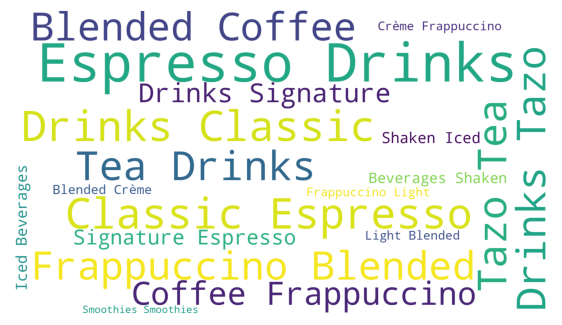

In [55]:
plt.subplots(
    figsize = (7, 5)
)

wordcloud = WordCloud(
      width            = 1920
    , height           = 1080
    , background_color = 'white'
    ).generate(" ".join(sb_full_menu['Beverage_category']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

---

## 3.2. <font size="6"><b><code>barplot()</code></b></font>

### <b><code>Beverage</code></b> vs. <b><code>Calories</code></b></font>

<font size="7"><b><code>sb_full_menu</code></b></font>

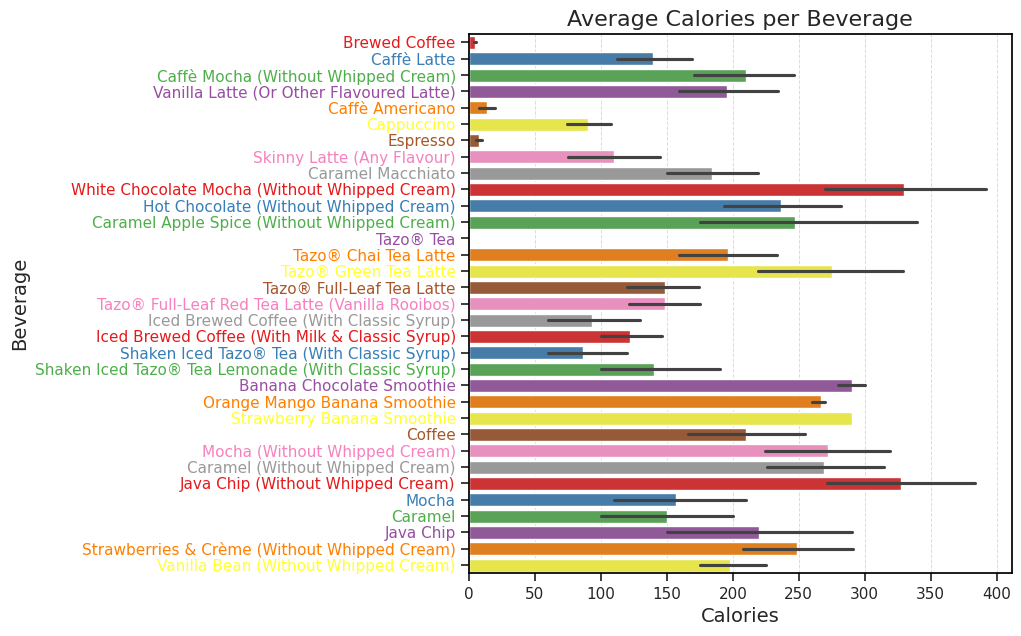

In [56]:
show_barplot(
      sb_full_menu
    , 'Calories'
    , 'Beverage'
    , title   = 'Average Calories per Beverage'
    , palette = "Set1"
    , figsize = (7, 7)
)

The horizontal bar chart above shows the average calories per beverage for a variety of drinks. From this chart, we can infer several things:

1. <b>Caloric Range:</b> The beverages are listed on the y-axis, and their corresponding average calorie content is shown on the x-axis. The chart provides a clear comparison of caloric content across different types of beverages.

2. <b>Lowest Calorie Beverages:</b> Some beverages, such as 'Brewed Coffee', have very low average calorie counts, likely because they do not contain milk, cream, or added sugar.

3. <b>Highest Calorie Beverages:</b> On the other end of the spectrum, there are beverages with significantly higher calorie counts, which could be due to the addition of milk, cream, syrups, and other high-calorie ingredients.

4. <b>Comparison of Beverage Categories:</b> The chart allows for a quick comparison between categories of beverages, such as brewed coffees, lattes, smoothies, and tea-based drinks.

5. <b>Variability within Categories:</b> There is noticeable variability within certain beverage categories. For example, among the 'Frappuccino' category, the calorie count varies widely, which could be due to different sizes or variations in the recipe.

6. <b>Impact of Whipped Cream:</b> Many beverages are specified as "(Without Whipped Cream)", suggesting that the addition of whipped cream would increase the calorie count. This indicates that toppings or additional ingredients can significantly impact the nutritional value of a drink.

7. <b>Error Bars:</b> Some bars have error lines at their ends, which might indicate the presence of standard deviation or another measure of variance, suggesting that the calorie counts for those beverages can vary depending on how they are prepared.

8. <b>Health Considerations:</b> Customers who are mindful of their caloric intake can use this chart to make informed decisions about which beverages to consume based on their dietary preferences or restrictions.

Overall, the chart is a useful visual tool for comparing the caloric content of different beverages at a glance, which could be beneficial for both consumers and health professionals.

---

### <b><code>Beverage_category</code></b> vs. <b><code>Calories</code></b></font>

<font size="7"><b><code>sb_full_menu</code></b></font>

Visualize the average calorie content for different beverage categories.

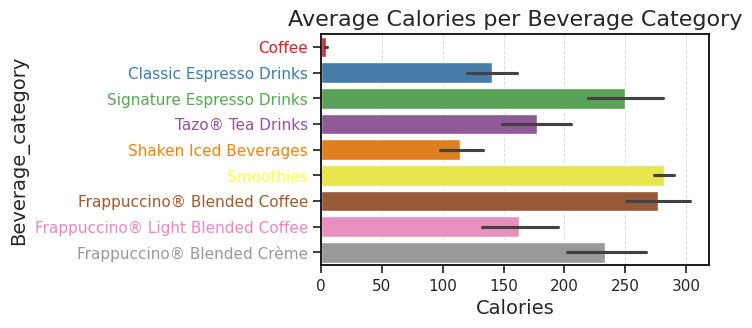

In [57]:
show_barplot(
      sb_full_menu
    , 'Calories'
    , 'Beverage_category'
    , title   = 'Average Calories per Beverage Category'
    , palette = "Set1"
    , figsize = (5, 3)
)

This <b><code>barplot</code></b> provides a comparative view of the caloric content across different beverage categories, offering insights into which types of drinks are lower or higher in calories. This information can be useful for customers who are calorie-conscious or for analyzing the nutritional offerings of the Starbucks menu.

1. <b>Variety in Caloric Content:</b> Different beverage categories have varying average calorie counts, indicating a diverse range of options from lower to higher calorie content.

2. <b>Lowest Calorie Options:</b> The <b><code>Coffee</code></b> category has the lowest average calorie count, which might consist of basic coffee beverages without added sugars or creams.

3. <b>Espresso Drinks:</b> <b><code>Classic Espresso Drinks</code></b> and <b><code>Signature Espresso Drinks</code></b> have relatively low average calorie counts, suggesting that these categories might include plain espresso shots or drinks with minimal additives.

4. <b>Tea Drinks:</b> <b><code>Tazo® Tea Drinks</code></b> have a moderate calorie count, likely because some tea beverages contain added sugars or milk.

5. <b>Iced Beverages:</b> <b><code>Shaken Iced Beverages</code></b> also have a moderate calorie count, which might include teas or coffees that are shaken with ice and possibly sweetened.

6. <b>Higher Calorie Options:</b> <b><code>Smoothies</code></b> and <b><code>Frappuccino®</code></b> categories (both <b><code>Blended Coffee</code></b> and <b><code>Blended Crème</code></b>) have higher average calories, which may be due to the inclusion of ingredients like fruit, milk, sugar, and cream.

7. <b>Light Options:</b> The <b><code>Frappuccino® Light Blended Coffee</code></b> has a lower average calorie count than the regular <b><code>Frappuccino® Blended Coffee </code></b>, indicating that the "light" versions are formulated to be lower in calories.

8. <b>Error Bars:</b> The error bars extending from the top of each bar indicate the range or variability of calories within that category. A longer error bar suggests greater variability among the drinks in that category, while a shorter error bar suggests more uniform calorie content.

* Each category's bar also has an error bar, which suggests there is variability in the calorie content within that category, and the error bar indicates the range of that variability.

* Overall, the data suggests that consumers looking to minimize calorie intake might prefer classic or signature espresso drinks, while those less concerned with calorie content might opt for smoothies, blended coffee, or crème drinks.

* The "Light" version of the Frappuccino® provides a middle ground between the high-calorie blended beverages and the lower-calorie espresso and tea options.

---

### <b><code>Beverage_prep</code></b> vs. <b><code>Calories</code></b></font>

<font size="7"><b><code>sb_full_menu</code></b></font>

Visualize the number of beverages with different preparation types.

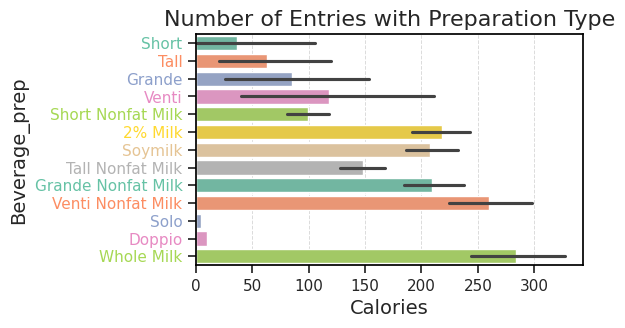

In [58]:
show_barplot(
      sb_full_menu
    , 'Calories'
    , 'Beverage_prep'
    , title   = 'Number of Entries with Preparation Type'
    , palette = "Set2"
    , figsize = (5, 3)
)

This barplot reprsents various drink preparation types at Starbucks. The x-axis represents calories, and the y-axis lists different preparation types, which include following options:
* Drink sizes: Short, Tall, Grande, Venti
* Milk fat content: Nonfat Milk, $2\%$ Milk, Soy Milk, Whole Milk
* Espresso shot: Solo, Doppio

Based on the plot, here's what can be inferred regarding sizes, milk options, and their impact on calorie content, as well as which preparations have the least and most calories:

1. <b>Sizes:</b> For drinks prepared with the same milk content, Venti size drinks tend to have the highest calorie content, which is expected due to their larger volume.

2. <b>Milk Options:</b> Soy Milk and $2\%$ Milk appear to have a moderate impact on calorie content, falling between Whole Milk and Nonfat Milk in terms of calories.

3. <b>Espresso Shots:</b> Solo and Doppio (single and double shot of espresso) have the lowest calorie counts on the chart, which is consistent with the fact that plain espresso shots contain very few calories.

4. <b>High-/low- Calorie Drinks:</b> The most calorie content within the drinks shown on the plot is associated with the Venti Nonfat Milk option. However, it's important to note that this might not necessarily represent the highest possible calorie drink available, as there could be Venti drinks with whole milk or additional syrups and flavorings that are not represented in the data shown here.

---

## 3.3. <font size="6"><b><code>catplot()</code></b></font>

### <b><code>Beverage_category</code></b> vs. <b><code>Calories</code></b></font> vs. <b><code>Beverage_prep</code></b>

<font size="7"><b><code>sb_full_menu</code></b></font>

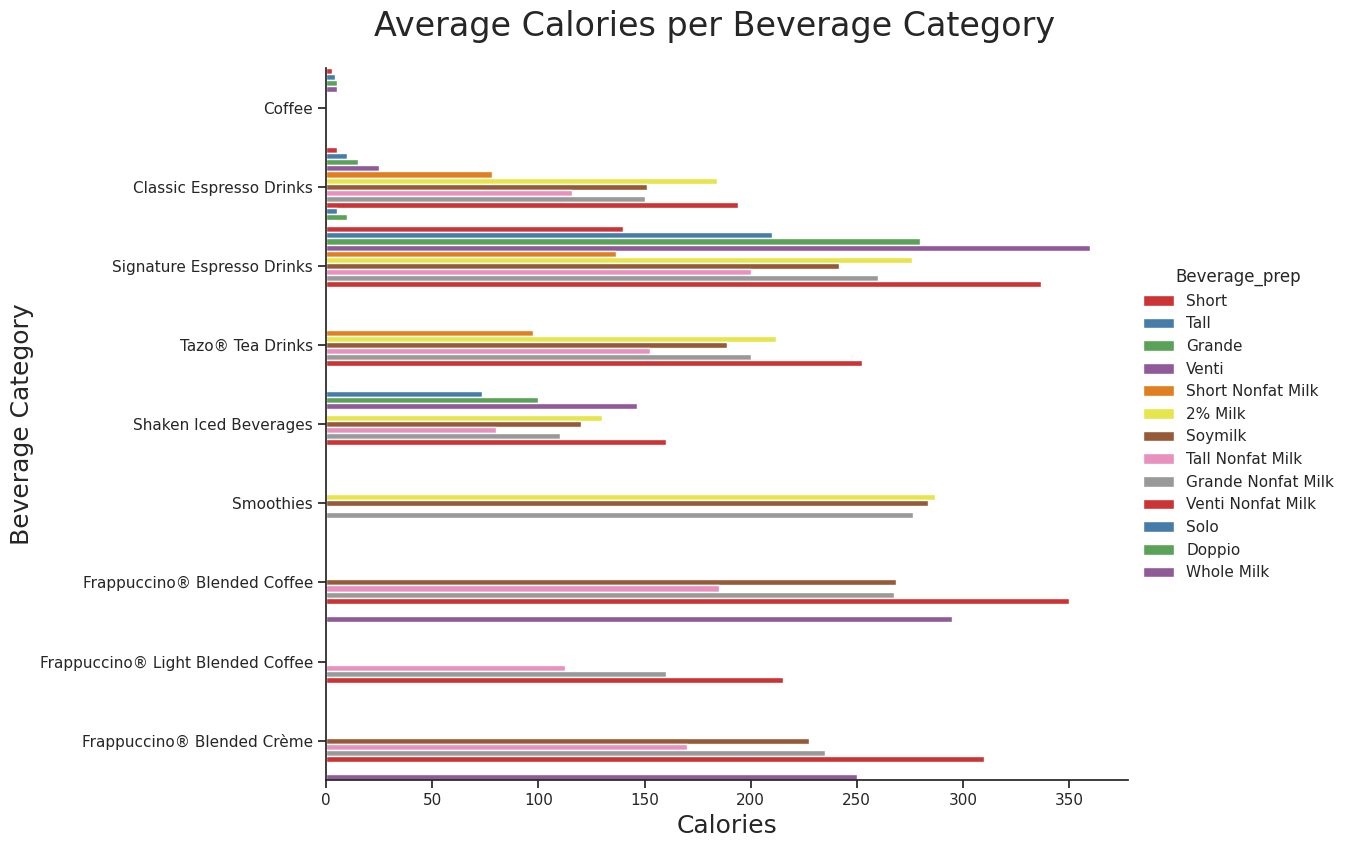

In [59]:
sns.set_theme(
    style = 'whitegrid'
)

sns.set_theme(
    style = "ticks"
)
# -----------------------------------------------------------------------------
ax = sns.catplot(
      data    = sb_full_menu
    , x       = "Calories"
    , y       = "Beverage_category"
    , ci      = None
    , hue     = "Beverage_prep"
    , kind    = "bar"
    , dodge   = True
    , width   = 1
    , aspect  = 1.5
    , height  = 8
    , palette = "Set1"
)
# -----------------------------------------------------------------------------
ax.set_axis_labels(
      x_var    = "Calories"
    , y_var    = "Beverage Category"
    , fontsize = 18
)

ax.fig.suptitle(
      "Average Calories per Beverage Category"
    , x        = 0.55
    , y        = 1.05
    , fontsize = 24
)
# -----------------------------------------------------------------------------
plt.show()

This <b><code>catplot</code></b> is useful for understanding the calorie content of different Starbucks beverage categories and how different preparations and milk options can affect the calorie content. It's an informative visual for anyone interested in comparing the nutritional content of Starbucks drinks.

Here's what can be inferred from the plot:

1. <b>Beverage Categories:</b> There are several beverage categories, such as Coffee, Classic Espresso Drinks, Signature Espresso Drinks, Tazo® Tea Drinks, Shaken Iced Beverages, Smoothies, and different types of Frappuccino®.

2. <b>Preparation Types:</b> Each beverage category includes a variety of preparation types, which are distinguished by color in the legend (e.g., Short, Tall, Grande, Venti, and different milk options like Whole Milk, Nonfat Milk, Soy Milk, etc.).

3. <b>Calorie Range:</b> The plot shows a range of average calories for each beverage category, with some categories like Frappuccino® Blended Crème having a wider range of calories, potentially due to different preparation types or ingredient options.

4. <b>Milk Options:</b> Different milk options appear to influence the calorie content of the beverages. For instance, beverages prepared with nonfat milk tend to have fewer calories compared to those prepared with whole milk or 2% milk.

5. <b>Calorie Comparison:</b> Some beverage categories, such as Classic Espresso Drinks, tend to have lower average calories across different preparations compared to more indulgent categories like Frappuccino® Blended Coffee or Frappuccino® Blended Crème.

6. <b>Trends in Beverage Category:</b> The plot suggests that the calorie content varies significantly within categories based on preparation types. For instance, 'Frappuccino® Blended Coffee' seems to have a wide calorie range, indicating that different sizes and milk options can greatly affect the calorie count.

7. <b>Least and Most Caloric Options:</b> Categories like 'Coffee' and 'Classic Espresso Drinks' appear to have the lowest average calorie counts, while 'Frappuccino® Blended Crème' drinks tend to be higher in calories on average.

8. <b>Data Variability:</b> The presence of error bars (the small horizontal lines at the end of each bar) indicates variability in the calorie count within each beverage preparation type, suggesting that there are multiple items contributing to the average and they may have a range of calorie values.

---

## 3.4. <font size="6"><b><code>scatterplot()</code></b></font>

### <b><code>Fat</code></b> vs. <b><code>Calories</code></b></font> vs. <b><code>Carbohydrate</code></b>

<font size="7"><b><code>sb_food_menu</code></b></font>

Scatter plots are a common plot where each point on the graph represents an entry in your data. They are commonly used to analyse the relationship between different variables. For instance, in the example below we see that Fat tends to correspond with higher calories in a Starbucks drink.

We can also use `hue=` to condition the color of each point based on another value, in this example `Carb. (g)`. From this we can see that lower carbohydrate content was associated with higher fat content.

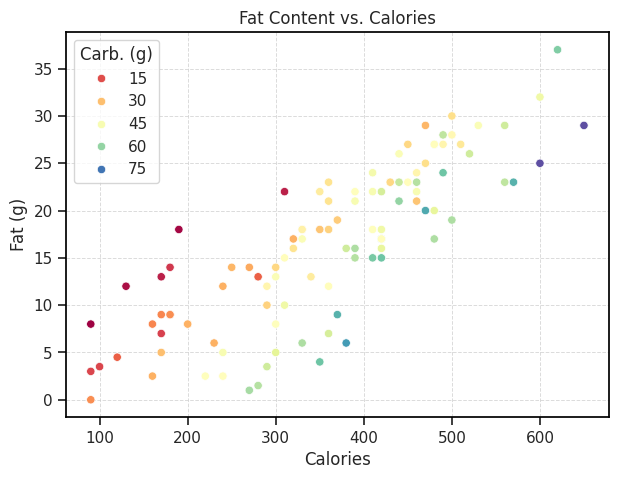

In [60]:
plt.figure(
    figsize=(7, 5)
)

sns.set_theme(
    style = 'whitegrid'
)
# -----------------------------------------------------------------------------
ax = sns.scatterplot(
      data    = sb_food_menu
    , x       = 'Calories'
    , y       = 'Fat (g)'
    , hue     = 'Carb. (g)'
    , palette = 'Spectral'
)
# -----------------------------------------------------------------------------
ax.set(
      xlabel = 'Calories'
    , ylabel = 'Fat (g)'
    , title  = 'Fat Content vs. Calories'
)

ax.set_frame_on(True)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.grid(
      alpha     = 0.7
    , linewidth = 0.7
    , linestyle = '--'
)

for spine in ['top', 'left', 'right', 'bottom']:
    ax.spines[spine].set_color('black')
# -----------------------------------------------------------------------------
plt.show()

This <b><code>scatterplot</code></b> is a useful visualization for understanding the nutritional composition of menu items, particularly how fat and carbohydrates contribute to the overall calorie content. From the plot, we can infer the following:

1. <b>Positive Correlation:</b> There appears to be a general positive correlation between fat content and calorie content. As the fat content increases, the calorie content tends to increase as well. This is expected since fat has a higher calorie density than carbohydrates or proteins.

2. <b>Carbohydrate Variation:</b> Items with similar fat content can have a wide range of calorie contents, which could be due to varying carbohydrate levels. For instance, items with higher carbohydrate content tend to have more calories, even if their fat content is similar to items with lower carbs.

3. <b>Dietary Balance:</b> Some items are low in both fat and calories, which might be appealing to those looking for lighter options. Conversely, items that are high in both fat and calories are likely to be more indulgent or rich in energy.

4. <b>Nutritional Diversity:</b> The plot shows a diverse range of nutritional profiles, suggesting the menu has a variety of items to cater to different dietary needs or preferences.

5. <b>Calorie-Dense Options:</b> The upper right area of the plot, where both fat and calories are high, is populated with fewer items, indicating that there are fewer high-fat, high-calorie options available compared to lower-fat, lower-calorie items.

6. <b>Data Spread:</b> There is a wide spread of points across the calorie axis, but less variation in fat content, indicating that calorie content varies more widely than fat content across the items. This could be due to varying amounts of carbohydrates and protein, which also contribute to calorie content.

---

## 3.5. <font size="6"><b><code>lmplot()</code></b></font>

### <b><code>Fat</code></b> vs. <b><code>Calories</code></b></font>

<font size="7"><b><code>sb_food_menu</code></b></font>

An LM plot is essentially just a scatter plot with the added ability to visualize a regression line on top of the data. In the example below we use linear regression, however if you are interested in using other regressors then take a look at the documentation to see what is available.

<Figure size 700x500 with 0 Axes>

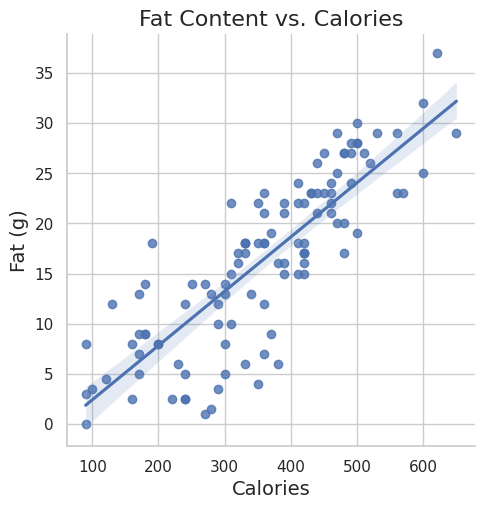

In [61]:
plt.figure(
    figsize=(7, 5)
)

sns.set_theme(
    style='whitegrid'
)
# -----------------------------------------------------------------------------
sns.lmplot(
      data = sb_food_menu
    , x    = 'Calories'
    , y    = 'Fat (g)'
)
# -----------------------------------------------------------------------------
plt.xlabel('Calories', size=14)
plt.ylabel('Fat (g)', size=14)
plt.title('Fat Content vs. Calories', size=16)
# -----------------------------------------------------------------------------
plt.show()

This lmplot provides a statistical view of the relationship between fat and calorie content, reinforcing the concept that higher fat content is associated with higher calorie content in food and drink items.

Here's what can be inferred from the figure:

1. <b>Positive Linear Relationship:</b> As mentioned above, there is a clear positive linear relationship between fat content and calories. As the calorie content increases, the fat content also increases, which is consistent with the fact that fat is calorie-dense, with 9 calories per gram.

2. <b>Regression Line:</b> The linear regression line (the straight line) through the data points suggests a model that best fits the observed relationship between fat content and calories.

3. <b>Data Spread:</b> The data points are fairly tightly clustered around the regression line, especially in the lower to middle range of calories and fat content. This indicates a strong linear relationship for items within this range.

4. <b>Variability at Higher Values:</b> There appears to be slightly more variability in fat content at higher calorie values, as the data points are more spread out from the regression line. This suggests that other factors may contribute to the calorie content apart from fat, such as carbohydrates and protein, or that there is more variability in the fat content of higher-calorie items.

5. <b>Consistency in Trend:</b> The consistency of the trend across the entire range of calories suggests that fat is a consistent contributor to the calorie content in the items represented in the dataset.

6. <b>Predictive Capability:</b> The regression line can be used to predict the fat content of an item based on its calorie content within the observed range, with a reasonable degree of confidence given the strong linear relationship.

---

## 3.6. <font size="6"><b><code>histplot()</code></b></font>

### Calories Probability Distribution

<font size="7"><b><code>sb_full_menu</code></b></font>

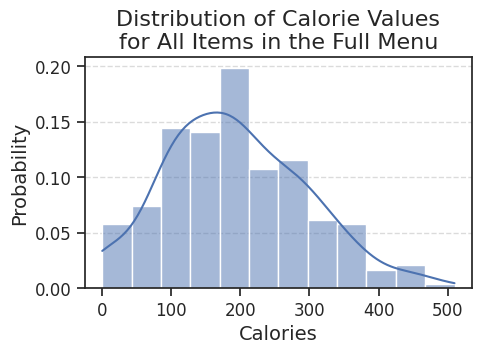

In [62]:
plt.figure(
    figsize=(5, 3)
)

sns.set_theme(
    style='ticks'
)
# -----------------------------------------------------------------------------
ax = sns.histplot(
      data  = sb_full_menu
    , x     = 'Calories'
    , kde   = True
    , stat  = 'probability'
)
# -----------------------------------------------------------------------------
ax.set_xlabel("Calories", fontsize=14)
ax.set_ylabel("Probability", fontsize=14)
ax.set_title("Distribution of Calorie Values\nfor All Items in the Full Menu", fontsize=16)

ax.tick_params(labelsize=12)

ax.grid(
      axis      = 'y'
    , alpha     = 0.7
    , linestyle = '--'
)
# -----------------------------------------------------------------------------
plt.show()

This figure is useful for understanding the overall nutritional profile of the menu items in terms of calorie content, indicating that the menu is likely to have a greater number of lower-calorie options and fewer high-calorie options.

From this histogram, we can infer the following:

1. <b>Skewed Distribution:</b> The distribution of calories is right-skewed, meaning there are more items with lower calorie content and fewer items with higher calorie content.

2. <b>Most Common Range:</b> The highest bar on the histogram indicates the most common range of calorie content among the items, which appears to be between roughly 100 and 200 calories.

3. <b>Probability Density:</b> The PDF curve, which is the smooth line, estimates the probability density of the data at different calorie levels. The peak of the curve corresponds to the mode of the data, which is the most frequently occurring calorie range.

4. <b>Lower-Calorie Items</b>: A significant proportion of the items have a lower calorie content, as shown by the height of the bars on the left side of the histogram.

5. <b>Tail of Distribution:</b> The long tail to the right suggests that while there are items with higher calorie content, they are less common.

6. <b>Outliers or High-Calorie Items:</b> The bars decreasing towards the right end indicate that high-calorie items are relatively rare in the dataset.

---

### Calories Count

<font size="7"><b><code>sb_full_menu</code></b></font>

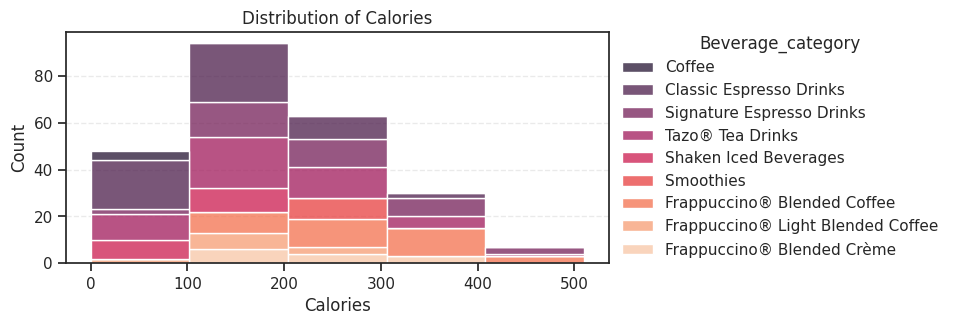

In [63]:
plt.figure(
    figsize = (7, 3)
)

sns.set_theme(
    style = 'ticks'
)
# -----------------------------------------------------------------------------
ax = sns.histplot(
      data     = sb_full_menu
    , x        = 'Calories'
    , hue      = 'Beverage_category'
    , bins     = 5
    , stat     = 'count'
    , palette  = 'rocket'
    , multiple = 'stack'
)
# -----------------------------------------------------------------------------
ax.set(
    title = "Distribution of Calories"
)

ax.grid(
      axis      = 'y'
    , alpha     = 0.4
    , linestyle = '--'
)

sns.move_legend(
      ax
    , loc            = "upper left"
    , frameon        = False
    , bbox_to_anchor = (1, 1.05)
)
# -----------------------------------------------------------------------------
plt.show()

This histogram provides insight into the caloric makeup of the beverage offerings, showing that there are options across the calorie spectrum, with a concentration of lower-calorie choices and fewer high-calorie selections.

From this figure, we can infer several points:

1. <b>Calorie Concentration:</b> Most of the beverages across all categories fall within the 0-200 calorie range. This indicates that the majority of options are relatively lower in calories.

2. <b>Category Diversity:</b> Each beverage category contributes a different amount to the calorie distribution, suggesting a variety of calorie counts within each category.

3. <b>Popular Calorie Range:</b> The tallest stack around the 100-calorie mark suggests that this is the most common calorie range across all beverage categories.

4. <b>Beverage Category Presence:</b> All categories have items in the lower calorie range (0-100 calories), but some categories such as "Frappuccino® Blended Crème" and "Smoothies" appear more frequently in the higher calorie ranges (200-300 calories and above).

5. <b>Low-Calorie Options:</b> The "Coffee" category shows a significant presence in the very low-calorie range (0-50 calories), which may indicate the availability of plain black coffee or other low-calorie coffee beverages.

6. <b>High-Calorie Options:</b> Categories like "Frappuccino® Blended Coffee" and "Frappuccino® Blended Crème" have items extending into the higher calorie ranges, which suggests that these beverages are made with ingredients that contribute to a higher calorie count, such as syrups, creams, or additional flavorings.

7. <b>Relative Proportions:</b> The varying heights of the colored segments within each calorie bin indicate the relative proportions of items from each category within that calorie range.

---

## 3.7. <font size="6"><b><code>heatmap()</code></b></font>

<font size="7"><b><code>sb_drink_menu</code></b></font>

Heatmaps show values of data with color. In the first example below, we can get a quick idea of the individual values within each column of the `sb_drink_menu` dataset by looking at the colors of each one. We need to standardize the data before using this visualization because otherwise columns that are on a different scale will be colored incorrectly.

In [64]:
sb_drink_menu.head()

,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
Unnamed: 0,,,,,,
Cool Lime Starbucks Refreshers™ Beverage,45.0,0.0,11.0,0.0,0.0,10.0
Strawberry Acai Starbucks Refreshers™ Beverage,80.0,0.0,18.0,1.0,0.0,10.0
Very Berry Hibiscus Starbucks Refreshers™ Beverage,60.0,0.0,14.0,1.0,0.0,10.0
Evolution Fresh™ Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0,5.0
Iced Coffee,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
scaler = StandardScaler()

sb_drink_menu_scaled = pd.DataFrame(
    scaler.fit_transform(
        sb_drink_menu
    )
)

sb_drink_menu_scaled.columns = sb_drink_menu.columns
sb_drink_menu_scaled.head()

,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,-1.032774,-0.739293,-0.909854,-0.406399,-0.922461,-0.890419
1,-0.697448,-0.739293,-0.475438,0.178419,-0.922461,-0.890419
2,-0.889063,-0.739293,-0.723676,0.178419,-0.922461,-0.890419
3,-0.410024,-0.739293,0.145156,-0.406399,-0.922461,-0.957771
4,-1.463909,-0.739293,-1.592508,-0.406399,-0.922461,-1.025124


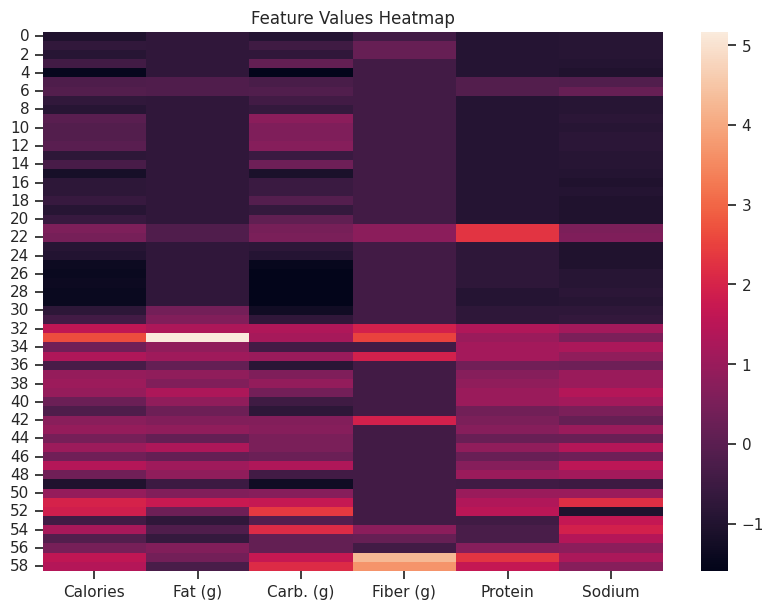

In [66]:
plt.figure(
    figsize=(10, 7)
)
# -----------------------------------------------------------------------------
sns\
.heatmap(
      data = sb_drink_menu_scaled
    , cmap = "rocket"
)\
.set(
      title  = 'Feature Values Heatmap'
    , ylabel = ''
)
# -----------------------------------------------------------------------------
plt.show()

The heatmap above represents a visualization of nutritional data for a the Starbucks drinks, with :
* Rows representing individual items.
* Columns representing nutritional components such as <b>Calories</b>, <b>Fat (g)</b>, <b>Carbohydrates (g)</b>, <b>Fiber (g)</b>, <b>Protein</b>, and <b>Sodium</b>.

The color intensity in each cell of the heatmap correlates with the value of the nutritional component for that particular drink item, according to the scale on the right side of the heatmap.

---

## 3.8. <font size="6"><font size="6"><b><code>corr()</code></b></font>

<font size="7"><b><code>sb_full_menu</code></b></font>

The most common use for a heatmap for data analysis is to construct a correlation plot, which plots the pairwise correlations for every variable. Note that we use what is called a mask to hide the top triangle of values as these are just repeats of what's below the diagonal.

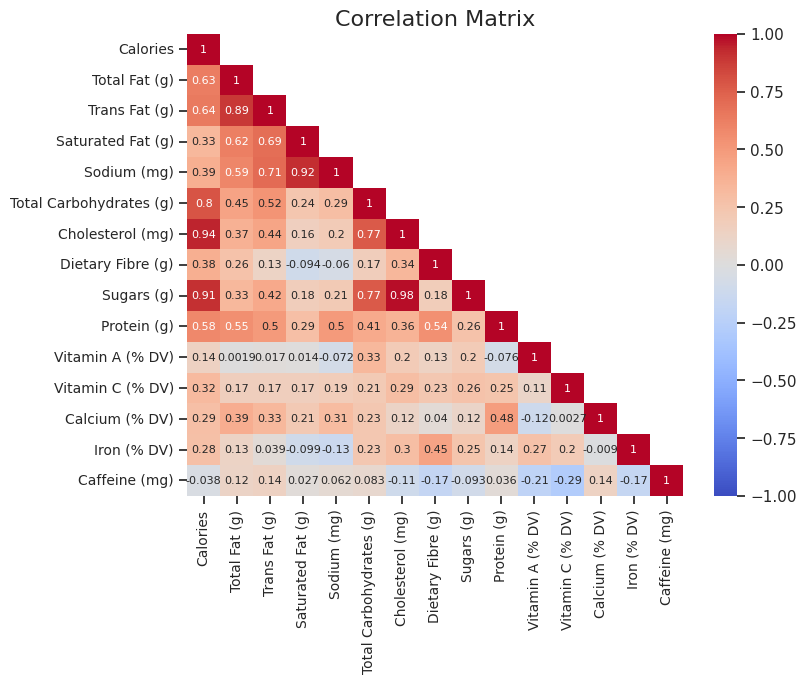

In [67]:
plot_correlation_heatmap(
      sb_full_menu
    , figsize = (8, 6)
)

The correlation matrix above is a visual representation of the Pearson correlation coefficients between different nutritional components of Starbucks drinks.

1. <b>High Positive Correlations</b>

  * There are several pairs of variables with high positive correlations, such as:

    <table>
    <tr>
        <th>Corr<br>value</th>
        <th>Feature 1</th>
        <th>Feature 2</th>
    </tr>
    <tr>
        <td><b><code>0.98</code></b></td>
        <td>Total Carb.</td>
        <td>Sugars</td>
    </tr>
    <tr>
        <td><b><code>0.94</code></b></td>
        <td>Calories</td>
        <td>Cholesterol</td>
    </tr>
    <tr>
        <td><b><code>0.91</code></b></td>
        <td>Calories</td>
        <td>Sugars</td>
    </tr>
    <tr>
        <td><b><code>0.89</code></b></td>
        <td>Total Fat</td>
        <td>Trans Fat</td>
    </tr>
    <tr>
        <td><b><code>0.63</code></b></td>
        <td>Calories</td>
        <td>Total Fat</td>
    </tr>
    </table>
  
  * These high positive correlations suggest that as the value of one variable increases, the value of the other variable tends to increase as well.

  * Each gram of fat contains $9$ calories, which is more than twice the calories per gram of carbohydrates or protein (each contains $4$ calories per gram). Therefore, items with higher fat content will naturally have higher caloric values, leading to a positive correlation between total fat and calories.
  
  * Similarly, sugars, a type of carbohydrate, contribute to the total caloric content because they are a source of energy. As sugar content increases, so does the caloric content, resulting in a positive correlation.

  * From a biochemical perspective, each macronutrient—carbohydrates, proteins, and fats—has a different role in the body and contributes differently to the caloric content of food. Their metabolic pathways are distinct, and their presence in a food item depends on the recipe and preparation methods. Foods rich in fats and sugars are often calorie-dense, which is why there is a positive correlation between these nutrients and total calories.

2. <b>No Strong Negative Correlations</b>
  
  * There are no strong negative correlations close to <b><code>-1</code></b> in this matrix, indicating that there are no pairs of nutritional components that have a strong inverse relationship.

  * For example, it's rare that a food item with increasing calories would have decreasing fat or sugar since these macronutrients directly contribute to the caloric content.

3. <b>Low or No Correlation</b>

  * Some pairs have a correlation close to <b><code>0</code></b>  because they do not directly influence each other or their presence in varying quantities does not imply a direct relationship. In other words, these values suggest that there is little to no <b>linear relationship</b> (since we're using the Pearson correlation) between these pairs of variables:

    <table>
    <tr>
        <th>Corr<br>value</th>
        <th>Feature 1</th>
        <th>Feature 2</th>
    </tr>
    <tr>
        <td><b><code>-0.038</code></b></td>
        <td>Calories</td>
        <td>Caffeine</td>
    </tr>
    <tr>
        <td><b><code>-0.094</code></b></td>
        <td>Dietary Fiber</td>
        <td>Sugars</td>
    </tr>
    </table>
  
  * For instance, caffeine content is primarily related to whether the drink is coffee-based and does not have a direct relationship with the caloric content of food items.
  
  * The lack of correlation between certain nutrients can occur when there is a diverse selection of items that include ingredients with varied nutritional profiles. For instance, some drinks might be high in caffeine but low in calories (such as black coffee), while others might be high in calories and low in caffeine (like a creamy, sugary frappuccino). The presence of such a wide range of combinations would result in little to no correlation between these two components.

4. <b>Nutritional Insights</b>
  
  The matrix provides insights into nutritional relationships, for example:

  * High correlation between Sugars and Total Carbohydrates indicates that sugars are a significant component of carbohydrates in these drinks.
  
  * High correlation between Calories and Sugars/Cholesterol suggests that higher-calorie drinks tend to have higher sugar and cholesterol content.

5. <b>Potential Multicollinearity</b>
  
  The presence of high correlations between certain variables (e.g., Total Fat and Trans Fat) could suggest multicollinearity if these variables were used in a multiple regression model, which could affect the model's estimates.

---

## 3.9. <font size="6"><b><code>pairplot()</code></b></font>

* A pair plot, also known as a $\small\textbf{scatterplot matrix}$, is a graphical tool used to visualize the relationships between pairs of variables in a dataset. It is particularly useful for exploring the relationships between multiple numerical variables simultaneously.

* In a pair plot, each variable (or feature) in the dataset is paired with every other variable, and a scatter plot of their relationship is plotted. If the dataset contains $n$ variables, the pair plot will contain $n\times n$ scatter plots organized in a grid format.

* The diagonal of the pair plot typically displays a univariate distribution plot (e.g., histogram or kernel density estimate) for each variable, showing the distribution of that variable.

* The off-diagonal plots show the relationship between pairs of variables through scatter plots.

* Pair plots are useful for:

  1. Exploring the relationships between multiple variables.
  2. Identifying patterns, trends, and correlations in the data.
  3. Detecting outliers or unusual observations.
  4. Assessing the suitability of variables for modeling or analysis.

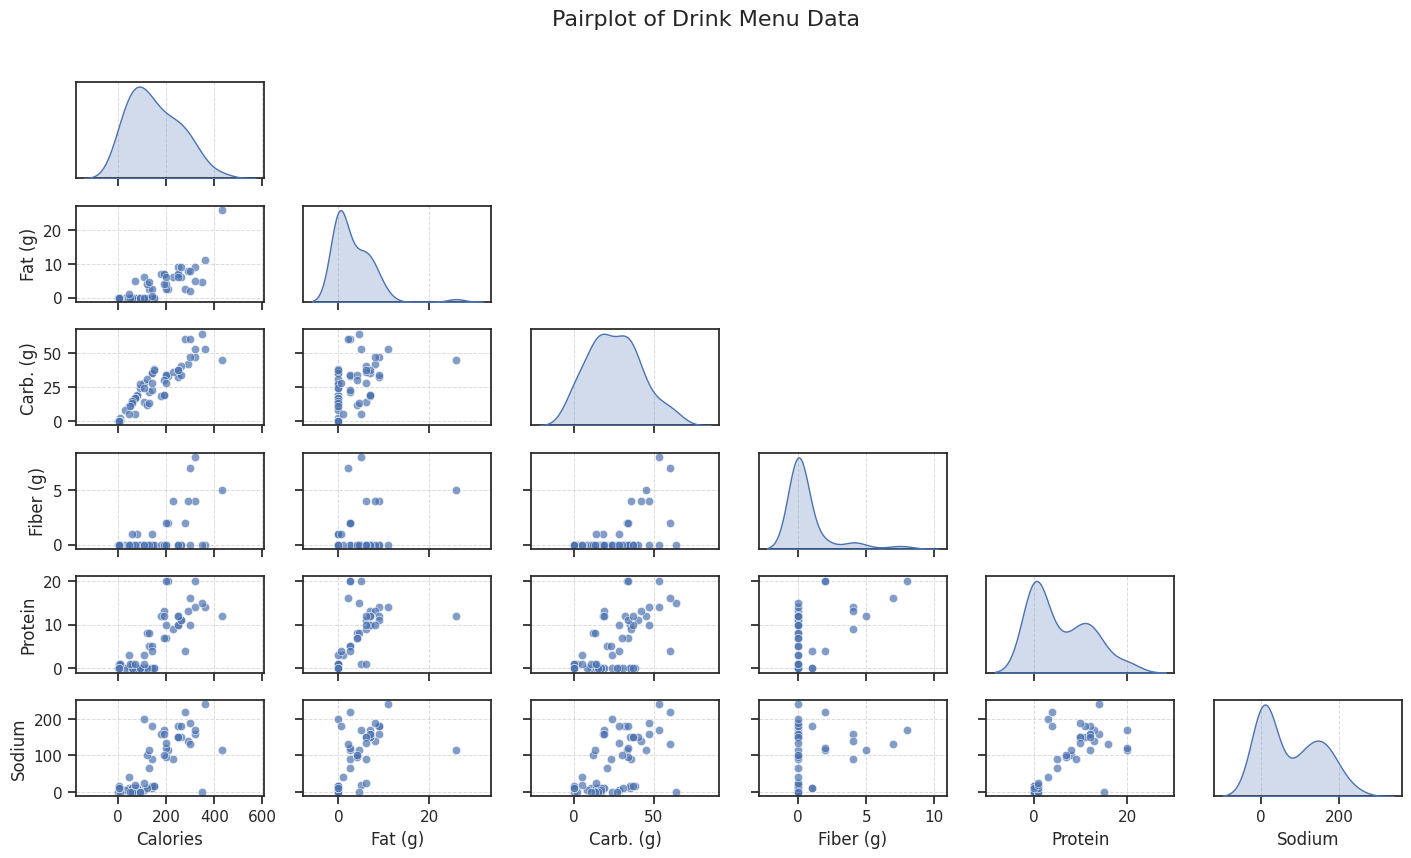

In [68]:
pair_grid = sns.pairplot(
      data      = sb_drink_menu
    , height    = 1.4
    , corner    = True
    , aspect    = 1.7
    , markers   = 'o'
    , plot_kws  = {'alpha': 0.7}
    , diag_kind = 'kde'
)
# -----------------------------------------------------------------------------
pair_grid.fig.suptitle(
      "Pairplot of Drink Menu Data"
    , y        = 1.02
    , fontsize = 16
)
# -----------------------------------------------------------------------------
# Loop through the axes in the PairGrid object
for i in range(len(pair_grid.axes)):

    for j in range(len(pair_grid.axes[i])):

        ax_ij = pair_grid.axes[i][j]

        if ax_ij is not None:

            # Set gridlines
            ax_ij.grid(
                  True
                , alpha     = 0.7
                , linewidth = 0.7
                , linestyle = '--'
            )

            # Add borders by setting the visibility of the spines
            for edge in ['top', 'right', 'left', 'bottom']:
                ax_ij\
                .spines[edge]\
                .set_visible(True)

            # For the last row, enable x-tick labels
            if i == len(pair_grid.axes) - 1:
                ax_ij.tick_params(
                      axis        = 'x'
                    , labelbottom = True
                )

            # For the first column, enable y-tick labels
            if j == 0:
                ax_ij.tick_params(
                      axis      = 'y'
                    , labelleft = True
                )
# -----------------------------------------------------------------------------
plt.tight_layout()
plt.show()

---

## 3.10. <font size="6"><b><code>boxplot()</code></b></font> , <font size="6"><b><code>boxenplot()</code></b></font> , <font size="6"><b><code>violinplot()</code></b></font>

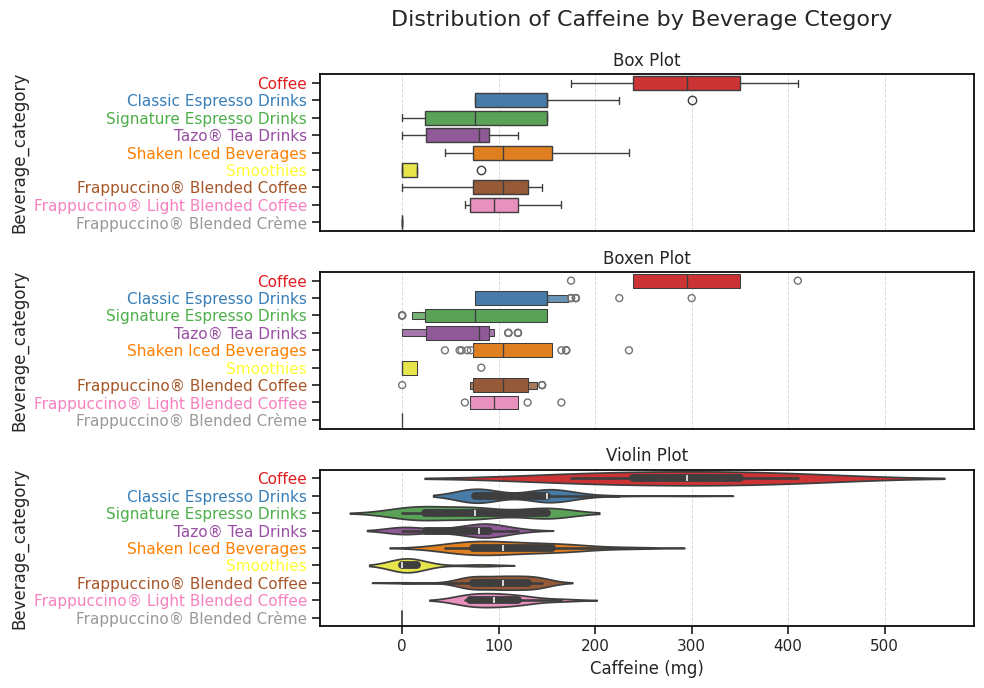

In [69]:
plot_box_boxen_violin_plots(
      sb_full_menu
    , x       = 'Caffeine (mg)'
    , y       = 'Beverage_category'
    , title   = 'Distribution of Caffeine by Beverage Ctegory'
    , palette = "Set1"
)

The figure above shows three different types of plots - a Box Plot, a Boxen Plot, and a Violin Plot - each representing the distribution of Caffeine (in mg) by Beverage Category at Starbucks.

<font color="#DF0334" size="5"><b>Box Plot</b></font>

Each box plot displays the median, interquartile range (IQR), and potential outliers for caffeine content within each beverage category.

* <b><code>Coffee</code></b>
  
  It has a relatively high median caffeine content with several outliers, indicating some coffee beverages have significantly higher caffeine than others.

* <b><code>Classic Espresso Drinks</code></b> <br> <b><code>Signature Espresso Drinks</code></b>

  They show a broad range of caffeine content but lower medians compared to the <b><code>Coffee</code></b> category.

* <b><code>Frappuccino® Blended Coffee</code></b> <br> <b><code>Frappuccino® Light Blended Coffee</code></b>

  They have lower caffeine medians and IQRs, suggesting they are generally lower in caffeine.

* <b><code>Tazo® Tea Drinks</code></b> <br> <b><code>Shaken Iced Beverages</code></b>

  They also show variability in caffeine content with some outliers indicating some beverages may be quite high in caffeine.

* <b><code>Smoothies</code></b> <br> <b><code>Frappuccino® Blended Crème</code></b>

  They generally have lower caffeine content, with <b><code>Frappuccino® Blended Crème</code></b> showing almost no variation, indicating these might be caffeine-free or have a negligible caffeine amount.

<font color="#DF0334" size="5"><b>Boxen Plot</b></font>

Boxen plots, or letter-value plots, provide a more detailed representation of the distribution of caffeine, particularly for larger datasets. They are similar to box plots but show more quantiles.

* <b><code>Coffee</code></b> <br> <b><code>Espresso Drinks</code></b>

   Similar to box plots, the boxenplot shows a wide distribution of caffeine content for these categories, indicating variability in caffeine levels within these beverages.

* <b><code>Smoothies</code></b> <br> <b><code>Frappuccino® Blended Crème</code></b>

  They have very compact boxen plots, consistent with their lower caffeine content.

<font color="#DF0334" size="5"><b>Violin Plot</b></font>

Violin plots combine the box plot with a $\small\textbf{Kernel Density Estimation (KDE)}$ , showing the probability density of the data at different values. KDE is a technique to estimate the $\small\textbf{Probability Density Function (PDF)}$ of the data.

* <b><code>Coffee</code></b>

  It has the widest and most asymmetric violin plot, indicating a wide distribution with a tail toward higher caffeine contents.

* <b><code>Classic Espresso Drinks</code></b> <br> <b><code>Signature Espresso Drinks</code></b>

  They have violin plots that are wide in the middle, suggesting a concentration of caffeine values around the median.

* <b><code>Frappuccino® Blended Coffee</code></b> <br> <b><code>Frappuccino® Light Blended Coffee</code></b>

  They have narrower violin plots, indicating less variation in caffeine content.

* The <b><code>Smoothies</code></b> <br> <b><code>Frappuccino® Blended Crème</code></b>

  These categories have very narrow violin plots, which is consistent with them having low caffeine variability, likely being on the lower end of the caffeine scale.

Overall, the plots indicate that coffee and espresso-based drinks have the highest and most variable caffeine content. In contrast, blended crème and smoothie beverages have lower and less variable caffeine content. The distribution patterns observed in these plots can inform consumers about the expected caffeine content in different beverage categories and can help them make choices based on their caffeine preferences or restrictions.

---

## 3.11. <font size="6"><b><code>jointplot()</code></b></font>

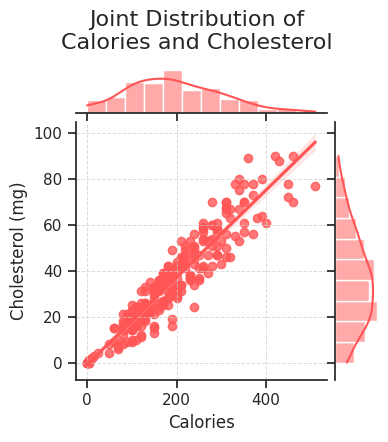

In [70]:
joint_plot_with_kde_contours(
      df     = sb_full_menu
    , x      = 'Calories'
    , y      = 'Cholesterol (mg)'
    , kind   = 'reg'
    , color  = '#ff5555'
    , height = 4
)

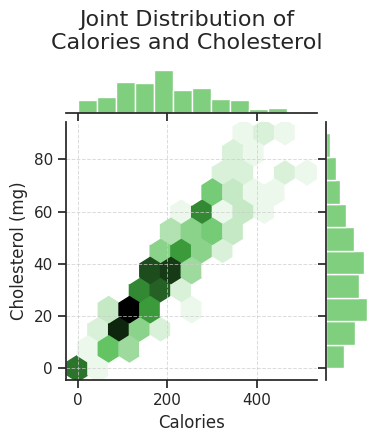

In [71]:
joint_plot_with_kde_contours(
      df     = sb_full_menu
    , x      = 'Calories'
    , y      = 'Cholesterol (mg)'
    , kind   = 'hex'
    , color  = '#55bf55'
    , height = 4
)

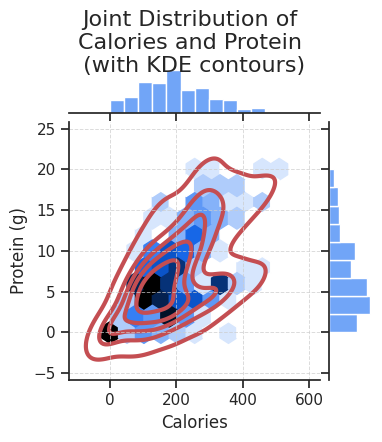

In [72]:
joint_plot_with_kde_contours(
      df           = sb_full_menu
    , x            = 'Calories'
    , y            = 'Protein (g)'
    , kind         = 'hex'
    , color        = '#4287f5'
    , height       = 4
    , kde_contours = True
)

A joint distribution plot with $\small\textbf{Kernel Density Estimate (KDE)}$ contours for two variables: Calories and Protein. The plot also includes marginal histograms for each variable on the top and right sides. Here's what we can infer from this plot:

1. <b>Density Concentrations:</b> The KDE contours represent areas of higher density where data points are more concentrated. The innermost contour surrounds the region with the highest concentration of data points. As the contours expand outward, they encompass areas with decreasing data point density.

2. <b>Relationship Between Calories and Protein:</b> There seems to be a positive relationship between Calories and Protein—higher values of Calories often coincide with higher values of Protein. This is indicated by the elongated shape of the contours along a line from the bottom left to the top right.

3. <b>Data Distribution:</b> The plot suggests that most of the data points cluster in a region that likely represents the typical range for Calories and Protein in the dataset. There are fewer observations with very high or very low values of Calories and Protein.

4. <b>Outliers:</b> There may be outliers or less frequent observations, as indicated by the contours that extend towards the extremes of the plot, especially in the Calories dimension.

5. <b>Marginal Distributions:</b>

  * The marginal histogram at the top shows the distribution of Calories independently of Protein. It seems to be right-skewed, indicating that there are a number of items with higher calorie content than the mode.

  * The marginal histogram on the right shows the distribution of Protein independently of Calories. This distribution seems more symmetric but might be slightly right-skewed, suggesting a concentration of items with moderate protein content and fewer items with very high or very low protein content.

6. <b>Most Common Range:</b> The darkest area of the KDE plot (the highest peak in the density) indicates the most common range of Calories and Protein for items in this dataset. This is where you would expect to find the typical or average item in terms of nutritional content.

7. <b>Negative Protein Values:</b> There is a region where the Protein values are negative, which should not occur as protein content cannot be negative. This might be due to data errors, or it might be an artifact of the KDE process, which can sometimes produce values outside the plausible range for a given variable. It's important to ensure data accuracy and possibly correct such errors.

---

## 3.12. <font size="6"><b><code>swarmplot()</code></b></font>

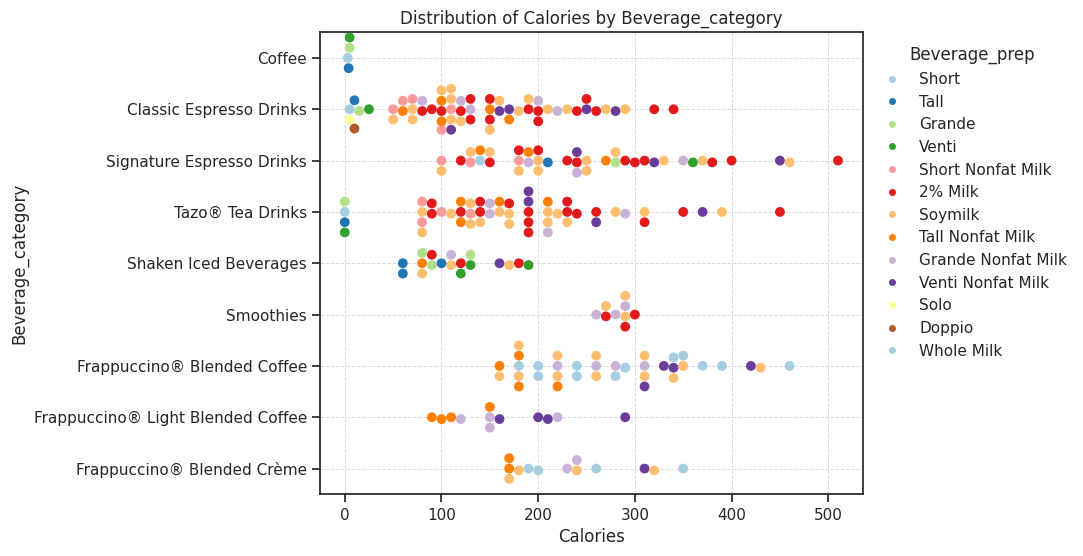

In [73]:
swarm_plot(
      df  = sb_full_menu
    , x   = 'Calories'
    , y   = 'Beverage_category'
    , hue = 'Beverage_prep'
)

 From this plot, we can infer several things:

1. <b>Caloric Distribution Across Categories:</b> Different beverage categories have different caloric distributions. For instance, 'Coffee' and 'Classic Espresso Drinks' seem to have lower calorie counts on average, while 'Frappuccino® Blended Coffee' and 'Frappuccino® Blended Crème' have higher calorie counts.

2. <b>Size Influence on Calories:</b> The size of the beverage (Short, Tall, Grande, Venti) appears to have a relationship with calorie content, which is intuitive as larger sizes generally contain more of the beverage and thus more calories. As the size increases from Short to Venti, we can generally observe an increase in calories.

3. <b>Milk Type Influence on Calories:</b> Different preparations, particularly the type of milk used (Nonfat, 2%, Soy, Whole), affect the caloric content of the beverages. For example, drinks prepared with whole milk tend to have more calories than those prepared with nonfat milk.

4. <b>Outliers and Variability:</b> Some beverage categories show a wide range of calories for the same type of preparation. This could be due to different ingredients or additional flavorings that increase the calorie count.

5. <b>Consistency within Categories:</b> Some categories show less variability in calories regardless of the preparation type, suggesting that the base beverage has a consistent calorie count, and the preparation method does not significantly alter it.

6. <b>Calories in Espresso Shots:</b> The 'Solo' and 'Doppio' categories, which refer to single and double shots of espresso, respectively, are shown to have very low calorie counts, consistent with espresso being a concentrated coffee with negligible calories when consumed without added milk or sugar.

This plot provides valuable insights into how beverage choice and preparation method can impact calorie intake, which could be useful for dietary planning or for a business to highlight lower-calorie options. It's also a clear visual tool for customers to understand the caloric implications of their beverage choices.

---

## 3.13. <font size="6"><b><code>ecdfplot()</code></b></font>

This plot is also known as an $\small\textbf{ogive}$, and it plots the proportion of values that are below a certain value. For example, from the graph below we can see that about $50\%$ of drinks have fewer than $140$ calories.

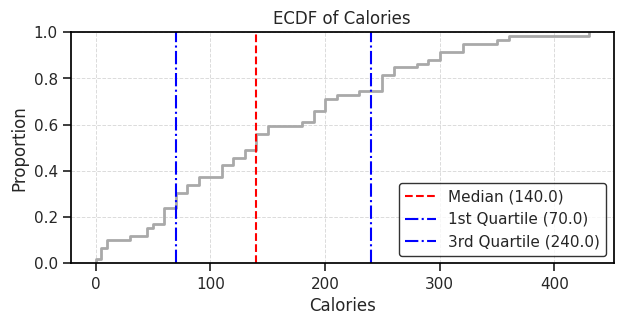

In [74]:
ecdf_plot(
      df    = sb_drink_menu
    , x     = 'Calories'
    , color = 'darkgrey'
    , figsize = (7, 3)
)

The $\small\textbf{Empirical Cumulative Distribution Function (ECDF)}$
 is a step function that shows the proportion of observations less than or equal to a particular value of the variable on the x-axis.

 The ECDF here provides a visual representation of the distribution of calorie values within the dataset, allowing for an assessment of the spread, central tendency, and potential skewness of the data. From this ECDF of Calories, we can infer the following:

1. <b>Distribution of Data:</b> The steepness of the curve at different points indicates how densely the data are distributed. Flatter sections of the ECDF suggest that there are fewer observations with those calorie values, while steeper sections indicate more observations within a small range of calorie values.

2. <b>Range of Data:</b> The x-axis shows the range of calorie values present in the dataset. This particular dataset appears to range from 0 to just over 400 calories.

3. <b>Proportion of Observations:</b> Any point on the ECDF curve gives the proportion of observations that have a calorie count less than or equal to that point. For example, if there's a point at x=100 and y=0.2, it means that 20% of the observations have 100 calories or fewer.

4. <b>Median:</b> The point where the ECDF crosses the 0.5 line on the y-axis represents the median of the dataset, which is the value below which 50% of the observations fall.

5. <b>Quartiles:</b> You can estimate the first quartile (25%) and third quartile (75%) from the points where the ECDF crosses the 0.25 and 0.75 lines on the y-axis, respectively. These points give you a sense of the central tendency and spread of the data.

6. <b>Outliers:</b> If there were any outliers, they might appear as points that are far away from the general trend of the curve, either at the lower or upper end of the x-axis.

7. <b>Skewness:</b> The shape of the ECDF can also give an indication of the skewness of the data. In this ECDF, the curve is relatively smooth and symmetric, which suggests that the distribution of calories might be fairly symmetric. However, since the steps at higher calorie values are less steep, this could indicate a slight right skewness (more spread out on the higher end).

8. <b>Absence of Censoring or Truncation:</b> The ECDF appears to cover the full range of the data without any abrupt stops, which suggests there is no censoring or truncation of calorie values at either end of the distribution.